## Практическое задание №2
### Метод кросс-энтропии с глубоким обучением

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

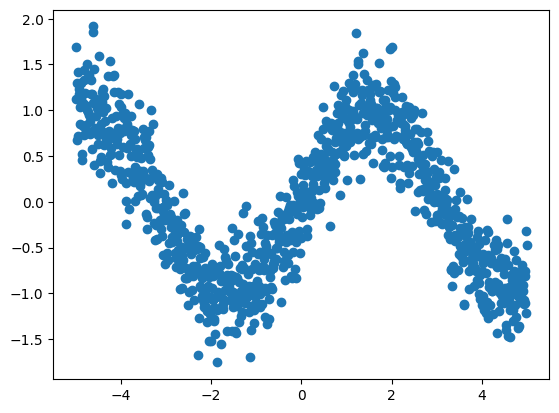

In [2]:
n = 1000
x = torch.linspace(-5., 5., n)
noise = torch.normal(0., 0.3, (1, n))
y = torch.sin(x) + noise
plt.scatter(x, y.numpy())
plt.show()

In [29]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1, 128)
        self.linear2 = nn.Linear(128, 1)
        self.relu = nn.ReLU()
        self.optimazer = torch.optim.SGD(self.parameters(), lr=1e-2)
    
    def forward(self, input_):
        hidden = self.linear1(input_)
        hidden = self.relu(hidden)
        output = self.linear2(hidden)
        return output

    def learn(self, x, y, step_n=300):
        for i in range(step_n):
            y_pred = self.forward(x)
            loss = torch.mean((y - y_pred)**2)
            print(f'step: {i} loss: {loss.data}')
            loss.backward()
            self.optimazer.step()
            self.optimazer.zero_grad()

step: 0 loss: 0.873957633972168
step: 1 loss: 0.9702181220054626
step: 2 loss: 1.1247742176055908
step: 3 loss: 1.3662165403366089
step: 4 loss: 1.7380990982055664
step: 5 loss: 2.3031442165374756
step: 6 loss: 3.1544370651245117
step: 7 loss: 4.41607141494751
step: 8 loss: 6.254387855529785
step: 9 loss: 8.836087226867676
step: 10 loss: 12.288732528686523
step: 11 loss: 16.479496002197266
step: 12 loss: 20.866565704345703
step: 13 loss: 24.184099197387695
step: 14 loss: 25.02018165588379
step: 15 loss: 22.575031280517578
step: 16 loss: 17.981611251831055
step: 17 loss: 13.272868156433105
step: 18 loss: 10.094305992126465
step: 19 loss: 8.701237678527832
step: 20 loss: 8.707202911376953
step: 21 loss: 9.48881721496582
step: 22 loss: 10.55654239654541
step: 23 loss: 11.386914253234863
step: 24 loss: 11.666655540466309
step: 25 loss: 11.122819900512695
step: 26 loss: 9.885664939880371
step: 27 loss: 8.15627384185791
step: 28 loss: 6.354035377502441
step: 29 loss: 4.710209369659424
step: 

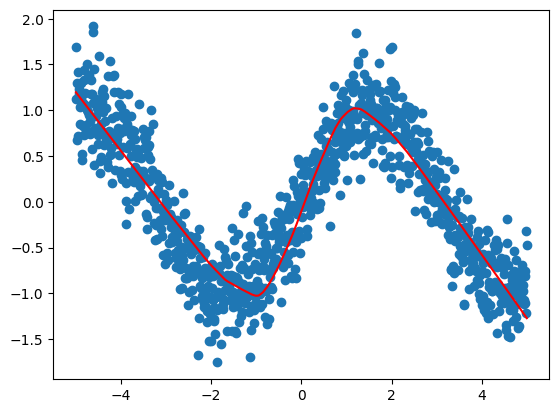

In [30]:
network = Network()
network.learn(x.reshape(-1, 1), y.reshape(-1, 1))
y_pred = network(x.reshape(-1, 1))
plt.scatter(x, y.numpy())
plt.plot(x, y_pred.data, 'r')
plt.show()